In [1]:
%run utils.ipynb

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from ipywidgets import interact


In [3]:
df = pd.read_csv('to_date_data_tidy.csv')

In [4]:
df.shape

(1924, 13)

In [5]:
df = df[df['manager_name'] != 'unknown']

In [6]:
df.shape

(1909, 13)

In [7]:
names = list(df['manager_name'].unique())

In [8]:
for name in names:
    df[f"win against {name}"] = 0

In [9]:
wins_df = df[df['win'] == 1 ]

In [10]:
wins_df.reset_index(inplace=True)

In [11]:
for index, name in zip(wins_df.index, wins_df['opponent_name']):
    #wins_df[f"win against {name}"] = 1
    if not name == 'unknown':
        wins_df.iloc[index, wins_df.columns.get_loc(f"win against {name}")] = 1

In [12]:
cat_columns = list(wins_df.columns[-14:])

In [13]:
win_heatmap = wins_df.groupby('manager_name')[cat_columns].sum()

In [14]:
win_heatmap.sort_index(axis=1, inplace=True)

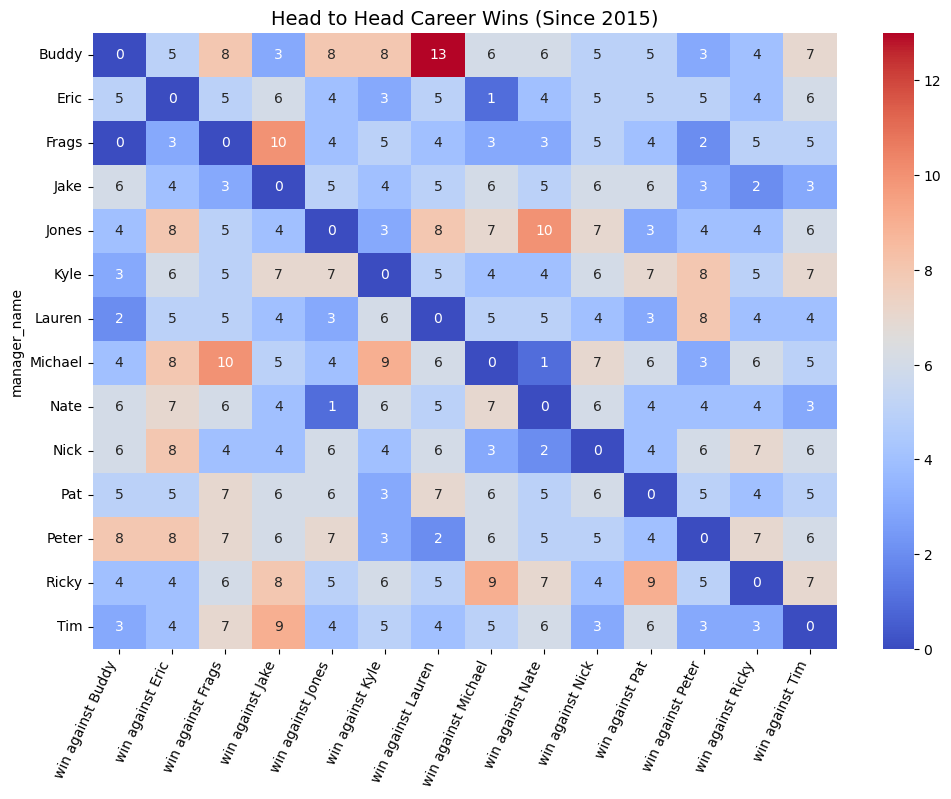

In [19]:
plt.figure(figsize=(12,8))
sns.heatmap(win_heatmap, cmap = 'coolwarm', annot=True)
plt.xticks(rotation=65, ha='right');
plt.title('Head to Head Career Wins (Since 2015)', size = 14);
plt.savefig('images/h2h_career_wins.png')

## Scratch Pad

In [16]:
# df['team_name'] = df['team_name'].apply(lambda name: name[1:])
# df['opponent_team_name'] = df['opponent_team_name'].apply(lambda name: name[1:])

# df['team_name'] = df['team_name'].apply(lambda x: x.strip('"').strip("'"))
# df['opponent_team_name'] = df['opponent_team_name'].apply(lambda x: x.strip('"').strip("'"))

# df['manager_name'] = df['team_name'].apply(map_teams_to_name)
# df['opponent_name'] = df['opponent_team_name'].apply(map_teams_to_name)

# df.rename({'season_id': 'in_season_manager_id'}, axis=1, inplace=True)

# df.rename({'opponent_season_id': 'in_season_opponent_manager_id'}, axis=1, inplace=True)

# df['win'] = np.where(df['points_for'] > df['points_against'], 1, 0)

# df.to_csv('to_date_data_tidy.csv', index=False)